### <span style="color:blue">1. Import Libraries</span> 

In [2]:
import pandas as pd

### <span style="color:blue"> 2. Ingest the Airbnb CSV file into Jupyter Notebook</span> 

Import the airbnb dataset using the `.read_csv()` syntax and use .info() to better understand the variables inside the dataset.

In [4]:
airbnb=pd.read_csv("/Users/giangpham/Documents/upskill/Data UMGC/Unit15/1696888486_1660149429_zipped_unit_15-5_new_instructions.zip/airbnb_2.csv")
print(airbnb.info)



<bound method DataFrame.info of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

       

### <span style="color:blue">3. Exploring your data with Pandas</span> 

We will using the following Pandas Skills:

<li> Subsetting a Pandas dataframe using [] and boolean operators </li>
<li> Summing up Records with value_counts()</li>
<li> Creating calculated fields </li>
<li> Group By in Pandas </li> 
<li> Creating Bar Plots with Matplotlib</li> 



<b> i)  We will count how many airbnb listings are in each of the 5 Neighbourhood Groups (Manhattan, Brooklyn, Queens, Bronx, Staten Island) and identify which Neighbourhood Groups has the largest number of Airbnb Listings </b>

In [5]:
airbnb_count=airbnb['neighbourhood_group'].value_counts(sort=True)
print(airbnb_count)

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


<b> ii) Calculate the % listings that each Neighbourhood Group contains. </b>

In [6]:
airbnb_count_props=airbnb['neighbourhood_group'].value_counts(sort=True, normalize=True)
print(airbnb_count_props)

neighbourhood_group
Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: proportion, dtype: float64


<b> iii) Create a new calculated field called "Revenue" and place this into the Airbnb Dataframe. This is to be calculated by using the Price Column x Number_Of_Reviews Columns </b>

In [7]:
airbnb["Revenue"]=airbnb["price"]*airbnb["number_of_reviews"]
print(airbnb.info)

<bound method DataFrame.info of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

       

<b> iv) Create a Bar Plot that shows which Neighbourhood Group has the highest average revenues (using.groupby()) </b>


neighbourhood_group
Manhattan        3375.960574
Brooklyn         2927.567400
Staten Island    2541.764075
Queens           2400.151077
Bronx            1999.439963
Name: Revenue, dtype: float64


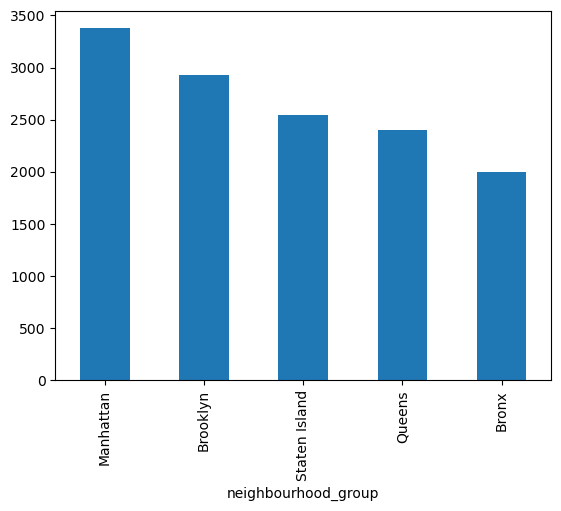

In [8]:
import matplotlib.pyplot as plt
avg_revenue_by_neighbor = airbnb.groupby("neighbourhood_group")["Revenue"].mean().sort_values(ascending=False)
print(avg_revenue_by_neighbor)
avg_revenue_by_neighbor.plot(kind="bar")
plt.show()

<b> V) Filter the Airbnb Dataframe to include only the Neighbourhood Groups `Manhattan`, `Brooklyn` and `Queens`. Identify the `top 3 Revenue Generating Neighborhoods` within each of the `three Neighbourhood_Groups`. <b>

In [9]:
# Filter Manhattan, Brooklyn, and Queens neighborhoods group only
filtered_airbnb = airbnb[airbnb['neighbourhood_group'].isin(['Manhattan','Brooklyn','Queens'])]

# group by neighborhood_group and neighbourhood
grouped_airbnb = filtered_airbnb.groupby(['neighbourhood_group','neighbourhood'])

# Revenue within group
grouped_revenue=grouped_airbnb[['neighbourhood_group','Revenue']].sum('Revenue').sort_values(['neighbourhood_group','Revenue'], ascending=[True,False])


# top 3 revenue generating neighborhoods
top3_neighbor = grouped_revenue.groupby('neighbourhood_group').head(3)

final = top3_neighbor.reset_index()
print(final)

  neighbourhood_group       neighbourhood   Revenue
0            Brooklyn        Williamsburg  12389011
1            Brooklyn  Bedford-Stuyvesant  12352457
2            Brooklyn            Bushwick   4762224
3           Manhattan              Harlem   8598692
4           Manhattan      Hell's Kitchen   8238991
5           Manhattan        East Village   7574535
6              Queens             Astoria   1880840
7              Queens    Long Island City   1374945
8              Queens            Flushing   1140450


<b> VI) Building on the previous question where have identified the top 3 Neighbourhoods within each of the three neighbourhood_groups based off Revenues, we will filter the Airbnb Dataframe to include only these neighbourhoods. 
    
Upon completion of this, identify the  <b>`top average revenue generating room type`</b> for each of the nine neighbourhoods and plot this out in a Bar Chart.</b>

In [10]:
# get top neighborhood from above
top_neighborhood= final['neighbourhood'].tolist()

#filter by neighborhood 
filtered_top_airbnb = airbnb[airbnb['neighbourhood'].isin(top_neighborhood)]

In [186]:
# calculate average revenue
grouped_top_airbnb = filtered_top_airbnb.groupby(['neighbourhood','room_type'])['Revenue'].mean().reset_index()
grouped_top_airbnb

,neighbourhood,room_type,Revenue
0,Astoria,Entire home/apt,2845.629921
1,Astoria,Private room,1549.394737
2,Astoria,Shared room,1250.160000
3,Bedford-Stuyvesant,Entire home/apt,5923.995600
4,Bedford-Stuyvesant,Private room,1409.256624
5,Bedford-Stuyvesant,Shared room,650.764706
6,Bushwick,Entire home/apt,4128.241888
7,Bushwick,Private room,1124.728912
8,Bushwick,Shared room,439.220588
9,East Village,Entire home/apt,4871.841880


In [195]:
# sort from highest
grouped_avg_revenue=grouped_top_airbnb.sort_values(['neighbourhood','room_type','Revenue'], ascending=[True,True,False]).reset_index(drop=True)

grouped_avg_revenue

,neighbourhood,room_type,Revenue
0,Astoria,Entire home/apt,2845.629921
1,Astoria,Private room,1549.394737
2,Astoria,Shared room,1250.160000
3,Bedford-Stuyvesant,Entire home/apt,5923.995600
4,Bedford-Stuyvesant,Private room,1409.256624
5,Bedford-Stuyvesant,Shared room,650.764706
6,Bushwick,Entire home/apt,4128.241888
7,Bushwick,Private room,1124.728912
8,Bushwick,Shared room,439.220588
9,East Village,Entire home/apt,4871.841880


In [196]:
# get the top average revenue for each neighborhood
final_avg=grouped_avg_revenue.groupby('neighbourhood').head(1).sort_values('Revenue',ascending=False).reset_index(drop=True)
final_avg

,neighbourhood,room_type,Revenue
0,Bedford-Stuyvesant,Entire home/apt,5923.995600
1,Harlem,Entire home/apt,4991.899614
2,Flushing,Entire home/apt,4879.349057
3,East Village,Entire home/apt,4871.841880
4,Williamsburg,Entire home/apt,4659.608673
5,Bushwick,Entire home/apt,4128.241888
6,Hell's Kitchen,Entire home/apt,4116.112890
7,Long Island City,Entire home/apt,3303.504167
8,Astoria,Entire home/apt,2845.629921


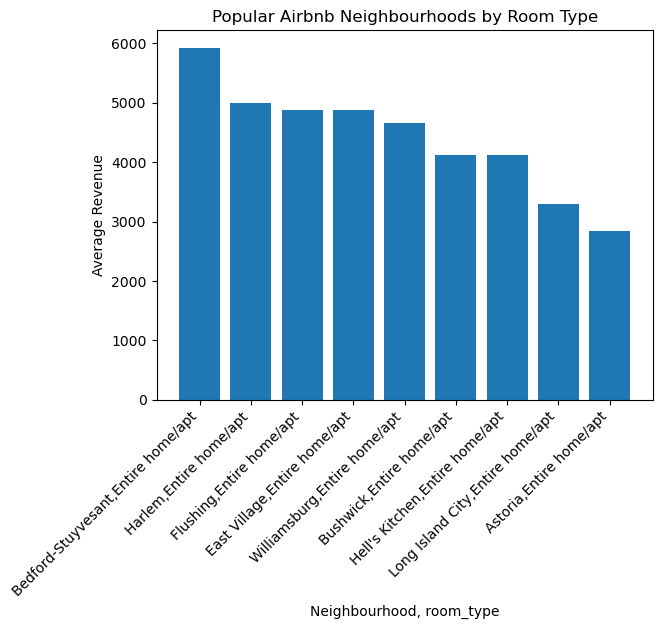

In [205]:
# Bar plot
plt.bar(x=final_avg['neighbourhood']+ ','+final_avg['room_type'], height=final_avg['Revenue'])
plt.xlabel('Neighbourhood, room_type')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45, ha='right')
plt.title('Popular Airbnb Neighbourhoods by Room Type')
plt.show()